In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/Users/hyunghoon/Desktop/머신러닝연습/흡연분류/smoking_data.csv")
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,F,55,160,70,74.0,1.0,1.0,1.0,1.0,125.0,...,12.5,1.0,1.0,29.0,13.0,14.0,Y,0,N,0
1,M,45,165,75,93.0,0.6,0.3,1.0,1.0,135.0,...,16.0,1.0,1.1,29.0,46.0,49.0,Y,1,Y,1
2,F,45,150,45,69.0,0.7,0.7,1.0,1.0,92.0,...,12.4,1.0,0.6,43.0,21.0,18.0,Y,0,N,0
3,M,25,175,65,80.7,1.2,1.2,1.0,1.0,118.0,...,16.0,2.0,1.0,18.0,9.0,15.0,Y,1,N,1
4,M,45,165,55,77.0,0.9,1.0,1.0,1.0,111.0,...,15.6,1.0,1.1,22.0,15.0,28.0,Y,1,Y,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39549,F,45,150,55,77.6,0.2,0.4,1.0,1.0,133.0,...,13.2,1.0,0.7,23.0,23.0,40.0,Y,0,N,0
39550,F,50,155,50,65.8,1.0,0.9,1.0,1.0,110.0,...,13.9,1.0,0.8,18.0,12.0,20.0,Y,0,N,1
39551,F,60,160,50,74.0,0.4,0.5,1.0,1.0,125.0,...,12.8,2.0,0.4,18.0,19.0,40.0,Y,0,N,0
39552,M,30,170,70,81.0,1.0,0.9,1.0,1.0,123.0,...,16.4,1.0,1.0,22.0,29.0,19.0,Y,0,Y,0


In [3]:
print(df.shape)
print("*" * 60)
print(df.isnull().sum())
print("*" * 60)
print(df.info())

(39554, 26)
************************************************************
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39554 entries, 0 to 39553
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  --

In [4]:
for i in df.columns:
  print(i, df[i].unique())

gender ['F' 'M']
age [55 45 25 35 30 20 60 50 65 40 70 80 75 85]
height(cm) [160 165 150 175 155 170 140 180 145 185 190 135 130]
weight(kg) [ 70  75  45  65  55  80 100  50  60  85 105  90  40  95  35 110 120  30
 115 125 135 130]
waist(cm) [ 74.   93.   69.   80.7  77.   78.   79.  105.   74.8  88.   65.   83.
  90.   87.  107.   99.   89.   72.   68.   82.   86.2  77.5  80.   70.
  86.   80.5  77.3  71.   82.4  74.7  91.   81.   75.   85.   68.8 101.
  84.   85.3  96.5  76.   75.8  79.1  95.  104.   80.1  73.   76.5  92.
  70.8  80.8  90.2  77.8  69.2  81.5  96.   64.3  74.1 100.7  75.5  76.2
  80.2  90.1  71.1  78.2  84.1  80.4  95.5  66.2  90.4  67.5  84.4  83.4
  85.5  78.5  83.8  85.4 100.   80.3  87.5  65.2  77.2  86.4  94.   66.
  83.9  85.2  75.4  78.1  64.   98.5  81.2  86.5  82.8  77.7  87.3  77.4
  68.5  71.5  95.4 102.   68.3  76.3 103.2  67.   87.9  79.2  92.9  75.6
  86.8  90.8  97.5  57.   91.1  99.2  85.7  74.3  98.   62.5  70.2  70.5
  87.4  58.   97.   62.   81.3  8

In [5]:
# oral은 'Y'밖에 없어서 이거 제거
df.drop(['oral'], axis =1, inplace=True)

In [6]:
# 범주형

df_label = df.select_dtypes(include ='object')
df_label.columns

Index(['gender', 'tartar'], dtype='object')

In [7]:
# from sklearn.preprocessing import LabelEncoder
# lb = LabelEncoder()
# lst = ['gender', 'tartar']
# for i in lst:
#   df[i] = lb.fit_transform(df[i])




In [8]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [9]:
x = pd.get_dummies(x)


In [10]:
x

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,gender_F,gender_M,tartar_N,tartar_Y
0,55,160,70,74.0,1.0,1.0,1.0,1.0,125.0,81.0,...,1.0,1.0,29.0,13.0,14.0,0,True,False,True,False
1,45,165,75,93.0,0.6,0.3,1.0,1.0,135.0,80.0,...,1.0,1.1,29.0,46.0,49.0,1,False,True,False,True
2,45,150,45,69.0,0.7,0.7,1.0,1.0,92.0,60.0,...,1.0,0.6,43.0,21.0,18.0,0,True,False,True,False
3,25,175,65,80.7,1.2,1.2,1.0,1.0,118.0,80.0,...,2.0,1.0,18.0,9.0,15.0,1,False,True,True,False
4,45,165,55,77.0,0.9,1.0,1.0,1.0,111.0,71.0,...,1.0,1.1,22.0,15.0,28.0,1,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39549,45,150,55,77.6,0.2,0.4,1.0,1.0,133.0,81.0,...,1.0,0.7,23.0,23.0,40.0,0,True,False,True,False
39550,50,155,50,65.8,1.0,0.9,1.0,1.0,110.0,79.0,...,1.0,0.8,18.0,12.0,20.0,0,True,False,True,False
39551,60,160,50,74.0,0.4,0.5,1.0,1.0,125.0,82.0,...,2.0,0.4,18.0,19.0,40.0,0,True,False,True,False
39552,30,170,70,81.0,1.0,0.9,1.0,1.0,123.0,85.0,...,1.0,1.0,22.0,29.0,19.0,0,False,True,False,True


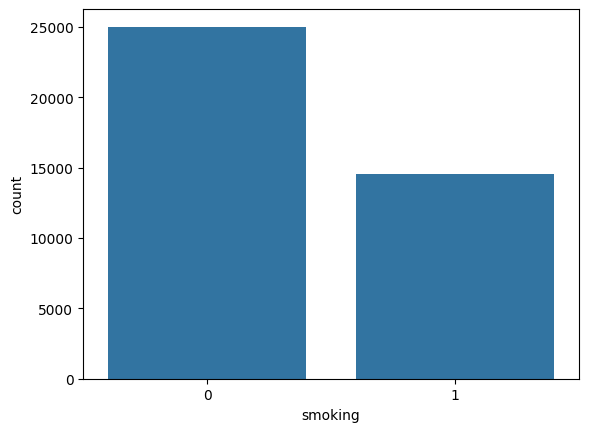

In [11]:
# y분포 확인
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.countplot(x=y)


plt.show()


# 표준화

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler_ss = StandardScaler()
scaler_mm = MinMaxScaler()
scaler_rb = RobustScaler()

In [14]:
x_train_scaled_ss = scaler_ss.fit_transform(x_train.iloc[:,:-4])
x_train.iloc[:,:-4] = x_train_scaled_ss
x_train

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,gender_F,gender_M,tartar_N,tartar_Y
25234,-0.342871,-2.143843,-1.242667,-0.441925,-1.037947,-1.430754,-0.161568,-0.161155,-2.309990,-1.653922,...,-0.214733,-1.239238,-0.685036,-0.473293,-0.582942,-0.524553,True,False,True,False
31398,-0.342871,-0.511090,-0.461808,0.421897,-0.029498,-0.018433,-0.161568,-0.161155,-0.916244,-0.618992,...,-0.214733,-1.239238,-0.298440,-0.502853,-0.400632,-0.524553,True,False,False,True
37850,0.895369,0.577412,2.271198,1.685237,-0.432878,-0.623714,-0.161568,-0.161155,0.037372,0.415938,...,-0.214733,0.491800,0.329779,0.058779,-0.319605,-0.524553,False,True,True,False
11165,1.308116,-1.055341,-0.852237,-0.010014,0.373881,0.385087,-0.161568,-0.161155,-0.549469,-0.308513,...,-0.214733,0.059041,0.281454,0.354375,-0.360118,-0.524553,True,False,False,True
21927,-0.755618,0.577412,-0.071379,-0.765859,0.373881,-0.018433,-0.161568,-0.161155,-0.622824,-0.929471,...,-0.214733,0.491800,0.039832,-0.177697,-0.542429,-0.524553,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9568,0.895369,0.577412,0.709480,1.069763,-0.432878,0.385087,-0.161568,-0.161155,-0.256048,-0.618992,...,-0.214733,0.491800,-0.201791,-0.089019,-0.218322,-0.524553,False,True,True,False
15267,-1.168364,1.121663,-0.852237,-1.154579,-0.029498,0.385087,-0.161568,-0.161155,1.064342,1.347375,...,-0.214733,0.059041,-0.443413,-0.502853,-0.481659,1.906384,False,True,False,True
1037,-0.755618,1.121663,1.099910,1.188539,0.373881,0.990367,-0.161568,-0.161155,0.624212,-0.412006,...,-0.214733,1.357320,-0.250115,-0.118578,-0.441145,-0.524553,False,True,False,True
11421,1.720863,0.033161,0.319051,0.097963,0.373881,-0.018433,-0.161568,-0.161155,1.724538,0.622924,...,-0.214733,1.790080,-0.250115,-0.207257,-0.198065,-0.524553,False,True,True,False


In [15]:
x_valid_scaled_ss = scaler_ss.transform(x_valid.iloc[:,:-4])
x_valid.iloc[:,:-4] = x_valid_scaled_ss
x_valid

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,gender_F,gender_M,tartar_N,tartar_Y
2107,0.895369,-1.055341,-0.852237,-0.981814,0.373881,0.385087,-0.161568,-0.161155,-0.109338,-0.722485,...,-0.214733,-0.373719,-0.105142,-0.177697,0.024759,-0.524553,True,False,False,True
27279,-0.755618,0.577412,0.319051,-0.010014,0.373881,0.385087,-0.161568,-0.161155,0.624212,0.415938,...,-0.214733,0.491800,0.523077,0.916007,2.597361,-0.524553,False,True,False,True
16270,0.482623,-1.055341,0.709480,1.933586,-0.029498,-0.018433,-0.161568,-0.161155,-0.182693,-0.412006,...,-0.214733,-2.104758,1.392918,1.743675,-0.299348,-0.524553,True,False,True,False
31304,1.308116,-1.599592,-0.071379,1.080561,0.373881,0.385087,-0.161568,-0.161155,-0.109338,0.415938,...,-0.214733,-1.239238,-0.346764,-0.266376,-0.319605,1.906384,True,False,True,False
25929,1.308116,0.033161,0.709480,0.745830,-0.432878,-1.027234,-0.161568,-0.161155,0.624212,0.415938,...,-0.214733,1.357320,-0.250115,-0.148138,-0.339862,-0.524553,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4872,-1.581111,1.121663,-0.461808,-0.441925,0.373881,0.385087,-0.161568,-0.161155,-0.989599,0.208952,...,-0.214733,-0.373719,-0.298440,-0.207257,-0.420889,1.906384,False,True,True,False
15478,-0.342871,-1.055341,-0.852237,-0.819848,0.978950,0.990367,-0.161568,-0.161155,-0.916244,-1.446936,...,-0.214733,-1.671998,-0.443413,-0.473293,-0.360118,-0.524553,True,False,False,True
34577,-0.755618,0.577412,1.099910,0.961786,0.373881,0.385087,-0.161568,-0.161155,0.990987,1.243882,...,-0.214733,-0.373719,-0.298440,0.117898,-0.441145,-0.524553,False,True,False,True
38353,-0.342871,0.033161,-0.852237,-1.305748,0.373881,0.385087,-0.161568,-0.161155,-1.576439,-1.032964,...,-0.214733,0.059041,-0.298440,0.088339,-0.420889,-0.524553,True,False,True,False


# Model

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier, XGBRFClassifier

In [17]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
ada = AdaBoostClassifier()
rf = RandomForestClassifier()# class_weight = 'balanced'
xgb = XGBClassifier()
xgbr = XGBRFClassifier()

In [18]:
lr.fit(x_train, y_train)
dt.fit(x_train, y_train)
ada.fit(x_train, y_train)
rf.fit(x_train, y_train)
xgb.fit(x_train, y_train)
xgbr.fit(x_train, y_train)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=None, reg_alpha=None, ...)

In [46]:
from sklearn.metrics import f1_score, accuracy_score, classification_report

pred1 = lr.predict(x_valid)
pred2 = dt.predict(x_valid)
pred3 = ada.predict(x_valid)
pred4 = rf.predict(x_valid)
pred5 = xgb.predict(x_valid)
pred6 = xgbr.predict(x_valid)

In [20]:
print(accuracy_score(y_valid, pred1))
print(accuracy_score(y_valid, pred2))
print(accuracy_score(y_valid, pred3))
print(accuracy_score(y_valid, pred4))
print(accuracy_score(y_valid, pred5))
print(accuracy_score(y_valid, pred6))
print("*" * 60)
print(f1_score(y_valid, pred1)) #로지스틱
print(f1_score(y_valid, pred2)) #의사결정나무
print(f1_score(y_valid, pred3)) #아다부스트
print(f1_score(y_valid, pred4)) #랜덤포레스트
print(f1_score(y_valid, pred5)) #xgb
print(f1_score(y_valid, pred6)) #xgbrf


0.7487043357350525
0.7584376185058779
0.7612185564403995
0.8119074706105422
0.7842244975350777
0.7570471495386171
************************************************************
0.6727033256503128
0.6733891642454282
0.6894624362978794
0.7512537612838516
0.7124810510358768
0.6933631142310146


# 추론

In [35]:
prediction = pd.read_csv("/Users/hyunghoon/Desktop/머신러닝연습/흡연분류/prediction.csv")
answer = pd.read_csv("/Users/hyunghoon/Desktop/머신러닝연습/흡연분류/prediction_answer.csv")

In [36]:
prediction.drop("Unnamed: 0", axis=1, inplace=True)

In [37]:
prediction

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar
0,F,40,150,50,69.0,1.2,1.0,1.0,1.0,117.0,...,99.0,12.7,1.0,0.8,20.0,14.0,11.0,Y,1,Y
1,F,40,150,60,88.0,1.2,1.0,1.0,1.0,113.0,...,149.0,14.5,1.0,0.8,32.0,40.0,61.0,Y,0,N
2,M,25,170,80,88.8,1.5,1.0,1.0,1.0,117.0,...,139.0,16.5,1.0,1.0,27.0,45.0,47.0,Y,0,N
3,M,25,180,70,81.0,1.0,1.0,1.0,1.0,126.0,...,104.0,16.1,1.0,0.8,16.0,8.0,17.0,Y,1,Y
4,M,50,165,60,87.0,1.2,2.0,1.0,1.0,119.0,...,120.0,15.6,1.0,0.7,31.0,34.0,63.0,Y,0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,M,35,165,75,86.2,1.2,1.0,1.0,1.0,114.0,...,118.0,15.7,1.0,1.1,26.0,37.0,19.0,Y,0,Y
4996,M,40,175,75,87.0,1.2,1.2,1.0,1.0,130.0,...,155.0,15.7,1.0,0.9,45.0,58.0,117.0,Y,0,Y
4997,F,55,150,50,70.0,1.5,1.2,1.0,1.0,103.0,...,129.0,12.6,1.0,0.7,45.0,31.0,15.0,Y,0,Y
4998,M,35,170,80,84.0,1.0,1.0,1.0,1.0,99.0,...,150.0,16.4,1.0,1.1,35.0,21.0,42.0,Y,0,Y


In [38]:
from sklearn.preprocessing import LabelEncoder
prediction.drop(['oral'], axis =1, inplace=True)
# lb = LabelEncoder()
# lst = ['gender', 'tartar']
# for i in lst:
#   prediction[i] = lb.fit_transform(prediction[i])

prediction = pd.get_dummies(prediction)
prediction

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,gender_F,gender_M,tartar_N,tartar_Y
0,40,150,50,69.0,1.2,1.0,1.0,1.0,117.0,84.0,...,1.0,0.8,20.0,14.0,11.0,1,True,False,False,True
1,40,150,60,88.0,1.2,1.0,1.0,1.0,113.0,66.0,...,1.0,0.8,32.0,40.0,61.0,0,True,False,True,False
2,25,170,80,88.8,1.5,1.0,1.0,1.0,117.0,79.0,...,1.0,1.0,27.0,45.0,47.0,0,False,True,True,False
3,25,180,70,81.0,1.0,1.0,1.0,1.0,126.0,85.0,...,1.0,0.8,16.0,8.0,17.0,1,False,True,False,True
4,50,165,60,87.0,1.2,2.0,1.0,1.0,119.0,75.0,...,1.0,0.7,31.0,34.0,63.0,0,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,35,165,75,86.2,1.2,1.0,1.0,1.0,114.0,70.0,...,1.0,1.1,26.0,37.0,19.0,0,False,True,False,True
4996,40,175,75,87.0,1.2,1.2,1.0,1.0,130.0,86.0,...,1.0,0.9,45.0,58.0,117.0,0,False,True,False,True
4997,55,150,50,70.0,1.5,1.2,1.0,1.0,103.0,61.0,...,1.0,0.7,45.0,31.0,15.0,0,True,False,False,True
4998,35,170,80,84.0,1.0,1.0,1.0,1.0,99.0,62.0,...,1.0,1.1,35.0,21.0,42.0,0,False,True,False,True


In [39]:
prediction_scaled = scaler_ss.transform(prediction.iloc[:,:-4])
prediction.iloc[:,:-4] = prediction_scaled

In [40]:
prediction

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,gender_F,gender_M,tartar_N,tartar_Y
0,-0.342871,-1.599592,-1.242667,-1.413725,0.373881,-0.018433,-0.161568,-0.161155,-0.329403,0.829910,...,-0.214733,-0.373719,-0.298440,-0.384615,-0.582942,1.906384,True,False,False,True
1,-0.342871,-1.599592,-0.461808,0.637852,0.373881,-0.018433,-0.161568,-0.161155,-0.622824,-1.032964,...,-0.214733,-0.373719,0.281454,0.383934,0.429893,-0.524553,True,False,True,False
2,-1.581111,0.577412,1.099910,0.724235,0.978950,-0.018433,-0.161568,-0.161155,-0.329403,0.312445,...,-0.214733,0.491800,0.039832,0.531732,0.146299,-0.524553,False,True,True,False
3,-1.581111,1.665914,0.319051,-0.117992,-0.029498,-0.018433,-0.161568,-0.161155,0.330792,0.933403,...,-0.214733,-0.373719,-0.491738,-0.561972,-0.461402,1.906384,False,True,False,True
4,0.482623,0.033161,-0.461808,0.529875,0.373881,1.999168,-0.161568,-0.161155,-0.182693,-0.101527,...,-0.214733,-0.806479,0.233130,0.206577,0.470407,-0.524553,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.755618,0.033161,0.709480,0.443492,0.373881,-0.018433,-0.161568,-0.161155,-0.549469,-0.618992,...,-0.214733,0.924560,-0.008493,0.295256,-0.420889,-0.524553,False,True,False,True
4996,-0.342871,1.121663,0.709480,0.529875,0.373881,0.385087,-0.161568,-0.161155,0.624212,1.036896,...,-0.214733,0.059041,0.909673,0.916007,1.564269,-0.524553,False,True,False,True
4997,0.895369,-1.599592,-1.242667,-1.305748,0.978950,0.385087,-0.161568,-0.161155,-1.356374,-1.550429,...,-0.214733,-0.806479,0.909673,0.117898,-0.501915,-0.524553,True,False,False,True
4998,-0.755618,0.577412,1.099910,0.205941,-0.029498,-0.018433,-0.161568,-0.161155,-1.649794,-1.446936,...,-0.214733,0.924560,0.426428,-0.177697,0.045016,-0.524553,False,True,False,True


In [41]:
final_pred = rf.predict(prediction)
final_pred

array([0, 0, 0, ..., 0, 0, 1])

In [42]:
answer.drop("Unnamed: 0", axis=1, inplace=True)
answer

,smoking
0,0
1,1
2,1
3,1
4,1
...,...
4995,0
4996,1
4997,0
4998,0


In [49]:
print(f1_score(answer, final_pred,average='weighted'))

0.815888295108232


In [47]:
print(classification_report(answer, final_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      3195
           1       0.73      0.78      0.75      1805

    accuracy                           0.81      5000
   macro avg       0.80      0.81      0.80      5000
weighted avg       0.82      0.81      0.82      5000

